## Strand Breaks analysis + C to T  with position analysis

We now perform unsupervised clustering based on strand breaks base composition analysis. We pool in data from multiple sources and collect strand break composition. Then we perform unsupervised clustering on the strand break composition of counts. 


In [8]:
options(warn=-1)
library(aRchaic)
library(CountClust)
library(maptpx)
library(grid)
library(gridBase)
library(classtpx)

Loading required package: slam

Attaching package: ‘classtpx’

The following objects are masked from ‘package:maptpx’:

    expit, logit, rdir, stm_tfidf



In [2]:
## Collect the strand  break composition for different population sources

sardinia_counts <- get(load("../processed_data/sardinia2017.rda"))
temp <- club_signature_counts(sardinia_counts)
sardinia_counts_CtoT <- filter_signatures_per_substitution(temp, pattern="C->T", use_prop = FALSE)
sardinia_counts_CtoT <- filter_signatures_only_location(sardinia_counts_CtoT, max_pos = 10)

left_strand_breaks <- as.numeric()
right_strand_breaks <- as.numeric()

strand_breaks <- get(load("../processed_data/strand-breaks-sardinia2017.rda"))
for(l in 1:length(strand_breaks)){
  left_strand_breaks <- rbind(left_strand_breaks, strand_breaks[[l]][[1]])
  right_strand_breaks <- rbind(right_strand_breaks, strand_breaks[[l]][[2]])
}
colnames(left_strand_breaks) <- paste0(colnames(left_strand_breaks), "_left")
colnames(right_strand_breaks) <- paste0(colnames(right_strand_breaks), "_right")


sardinia_filtered <- cbind(sardinia_counts_CtoT, left_strand_breaks, right_strand_breaks)


gosling_counts <- get(load("../processed_data/annagosling2016-counts-table.rda"))
temp <- club_signature_counts(gosling_counts)
temp <- temp[-28,];
gosling_counts_CtoT <- filter_signatures_per_substitution(temp, pattern="C->T", use_prop = FALSE)
gosling_counts_CtoT <- filter_signatures_only_location(gosling_counts_CtoT, max_pos = 10)

left_strand_breaks <- as.numeric()
right_strand_breaks <- as.numeric()

strand_breaks <- get(load("../processed_data/strand-breaks-gosling2016.rda"))
for(l in 1:length(strand_breaks)){
  left_strand_breaks <- rbind(left_strand_breaks, strand_breaks[[l]][[1]])
  right_strand_breaks <- rbind(right_strand_breaks, strand_breaks[[l]][[2]])
}
colnames(left_strand_breaks) <- paste0(colnames(left_strand_breaks), "_left")
colnames(right_strand_breaks) <- paste0(colnames(right_strand_breaks), "_right")


gosling_filtered <- cbind(gosling_counts_CtoT, left_strand_breaks[-28,], right_strand_breaks[-28,])

sherpa_counts <- get(load("../processed_data/sherpa2017.rda"))
temp <- club_signature_counts(sherpa_counts)
sherpa_counts_CtoT <- filter_signatures_per_substitution(temp, pattern="C->T", use_prop = FALSE)
sherpa_counts_CtoT <- filter_signatures_only_location(sherpa_counts_CtoT, max_pos = 10)

left_strand_breaks <- as.numeric()
right_strand_breaks <- as.numeric()

strand_breaks <- get(load("../processed_data/strand-breaks-sherpa.rda"))
for(l in 1:length(strand_breaks)){
  left_strand_breaks <- rbind(left_strand_breaks, strand_breaks[[l]][[1]])
  right_strand_breaks <- rbind(right_strand_breaks, strand_breaks[[l]][[2]])
}
colnames(left_strand_breaks) <- paste0(colnames(left_strand_breaks), "_left")
colnames(right_strand_breaks) <- paste0(colnames(right_strand_breaks), "_right")

sherpa_filtered <- cbind(sherpa_counts_CtoT, left_strand_breaks, right_strand_breaks)

thousandg_counts_clubbed <- get(load("../processed_data/1000Gmoderns-clubbed_counts-table.rda"))
temp <- thousandg_counts_clubbed
thousandg_counts_CtoT <- filter_signatures_per_substitution(temp, pattern="C->T", use_prop = FALSE)
thousandg_counts_CtoT <- filter_signatures_only_location(thousandg_counts_CtoT, max_pos = 10)

left_strand_breaks <- as.numeric()
right_strand_breaks <- as.numeric()

strand_breaks <- get(load("../processed_data/strand-breaks-1000g.rda"))
indices <- match(as.character(paste0(rownames(thousandg_counts_clubbed), ".csv")), as.character(names(strand_breaks)))
for(l in 1:length(strand_breaks)){
  left_strand_breaks <- rbind(left_strand_breaks, strand_breaks[[l]][[1]])
  right_strand_breaks <- rbind(right_strand_breaks, strand_breaks[[l]][[2]])
}
colnames(left_strand_breaks) <- paste0(colnames(left_strand_breaks), "_left")
colnames(right_strand_breaks) <- paste0(colnames(right_strand_breaks), "_right")

left_strand_breaks <- left_strand_breaks[indices, ]
right_strand_breaks <- right_strand_breaks[indices, ]

thousandg_filtered <- cbind(thousandg_counts_CtoT, left_strand_breaks, right_strand_breaks)

hgdp_counts <- get(load("../processed_data/HGDPmoderns-counts-table.rda"))
temp <- club_signature_counts(hgdp_counts)
hgdp_counts_CtoT <- filter_signatures_per_substitution(temp, pattern="C->T", use_prop = FALSE)
hgdp_counts_CtoT <- filter_signatures_only_location(hgdp_counts_CtoT, max_pos = 10)

left_strand_breaks <- as.numeric()
right_strand_breaks <- as.numeric()

strand_breaks <- get(load("../processed_data/strand-breaks-hgdp.rda"))
for(l in 1:length(strand_breaks)){
  left_strand_breaks <- rbind(left_strand_breaks, strand_breaks[[l]][[1]])
  right_strand_breaks <- rbind(right_strand_breaks, strand_breaks[[l]][[2]])
}
colnames(left_strand_breaks) <- paste0(colnames(left_strand_breaks), "_left")
colnames(right_strand_breaks) <- paste0(colnames(right_strand_breaks), "_right")

hgdp_filtered <- cbind(hgdp_counts_CtoT, left_strand_breaks, right_strand_breaks)


names <- rownames(gosling_counts);
control_indices <- c(grep("EXN", names), grep("Libneg", names), grep("PCRneg", names))

gosling_controls_filtered <- gosling_filtered[control_indices,]
gosling_ancient_filtered <- gosling_filtered[-control_indices,]



ll <- list()

ll[["sardinia"]] <- sardinia_filtered
ll[["sherpa"]] <- sherpa_filtered
ll[["gosling-control"]] <- gosling_controls_filtered
ll[["gosling-ancient"]] <- gosling_ancient_filtered
ll[["1000G"]] <- thousandg_filtered[1:100,]
ll[["hgdp"]] <- hgdp_filtered

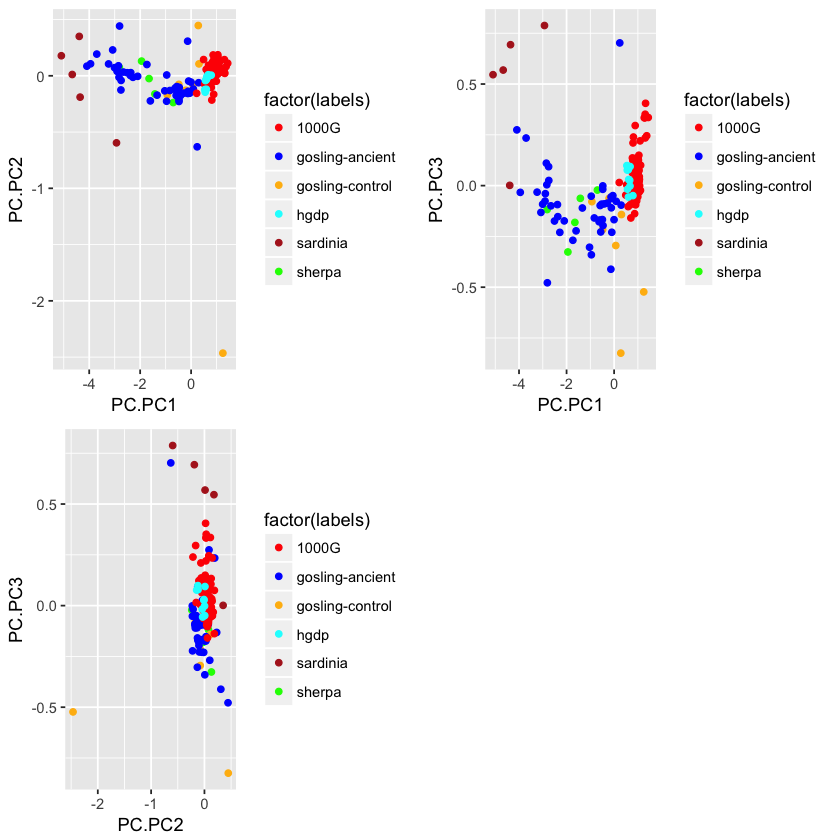

In [3]:
mat2 <- do.call(rbind, ll);
labs <- unlist(lapply(1:length(ll), function(x) return (rep(names(ll)[x], dim(ll[[x]])[1]))))
tmp <- gridPCA_signatures(mat2[,1:10], factor(labs), normalize = TRUE, cols=c("red","blue","darkgoldenrod1","cyan","firebrick", "green",
                                                                      "hotpink","burlywood","yellow","darkgray","deepskyblue","darkkhaki",
                                                                      "brown4","darkorchid","magenta","yellow", "azure1","azure4"))



In [4]:
dim(mat2)

[1] 174  18


Estimating on a 174 document collection.
Fitting the 4 topic model.
log posterior increase: 10335824.02, 674681.41, 33321.37, 12074.63, 2907.95, 746.81, 311.63, 180.14, 120.23, 86.81, 66.69, 26.91, 19.6, 16.09, 61.19, 9.15, 31.21, 10.37, 10.18, 8.69, 6.44, 4.92, 4.6, 4.34, 5.13, 4.78, 5.41, 4.97, 3.94, 4.7, 4.36, 4.06, 3.78, 4.24, 4.03, 3.87, 3.07, 2.96, 2.84, 2.72, 2.6, 2.48, 2.31, 2.4, 2.32, 2.24, 2.34, 2.24, 2.13, 2.03, 1.93, 1.85, 1.77, 1.71, 1.66, 1.61, 1.1, 1.1, 1.09, 1.7, 1.73, 1.9, 2.64, 3.38, 3.08, 2.75, 2.62, 2.41, 2.18, 2.05, 1.91, 1.8, 1.7, 1.61, 1.51, 1.37, 1.35, 1.33, 1.29, 1.24, 1.19, 1.16, 1.12, 1.08, 1.06, 1.02, 0.99, 0.97, 0.95, 0.92, 0.9, 0.88, 0.86, 0.85, 0.84, 0.81, 0.8, 0.79, 0.78, 0.78, p 18 iter 1000 diff 1
0.77, 0.77, 0.76, 0.74, 0.73, 0.35, 0.49, 0.64, 0.33, 0.33, 0.33, 0.32, 0.32, 0.32, 0.31, 0.31, 0.31, 0.3, 0.3, 0.3, 0.29, 0.29, 0.64, 0.61, 0.57, 0.52, 0.49, 0.47, 0.46, 0.47, 0.49, 0.5, 0.5, 0.47, 0.43, 0.4, 0.38, 0.38, 0.39, 0.41, 0.4, 0.37, 0.34, 0.32, 0

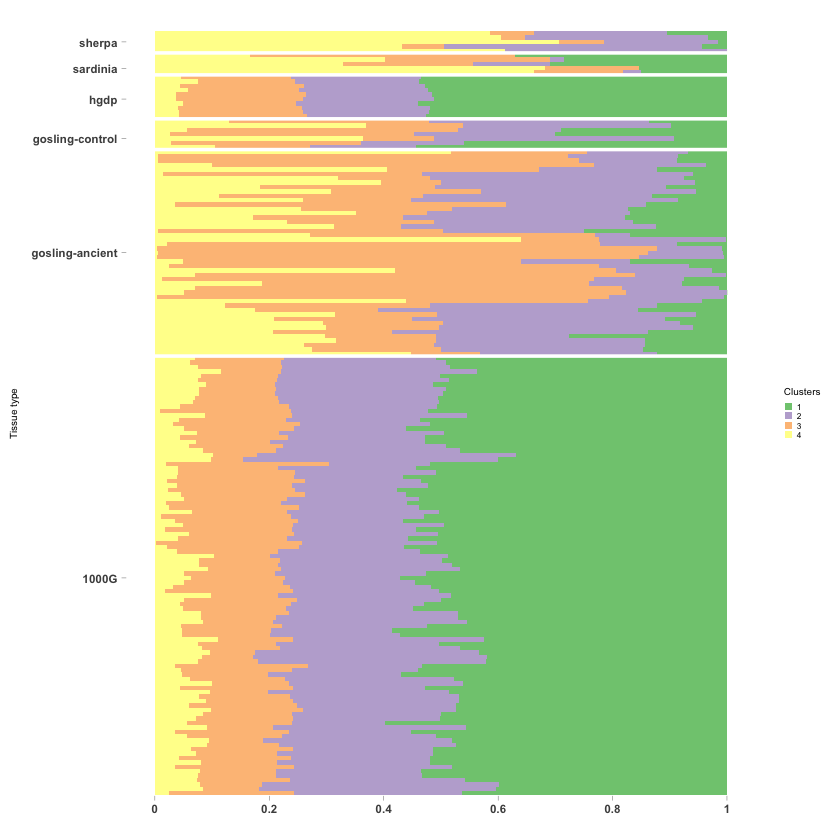

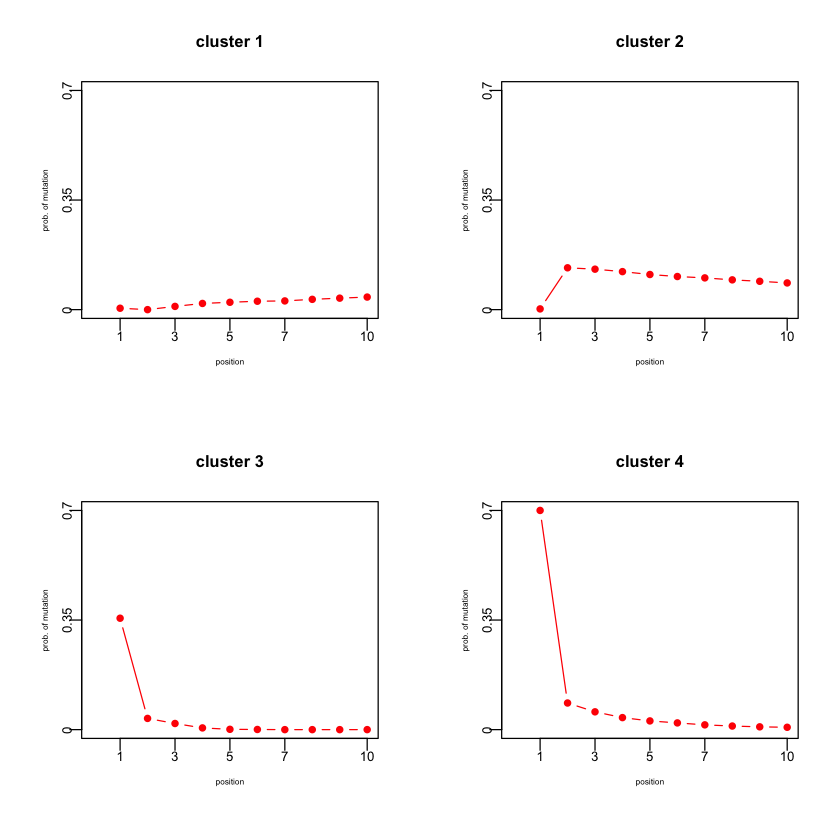

In [6]:
## Run the topic model on that signature data (4 left stand breaks  +  4 right strand breaks + 10 positions from read )

topic_clus <- maptpx::topics(mat2, K=4, tol=0.01)
omega <- topic_clus$omega;
annotation <- data.frame(
  sample_id = paste0("X", c(1:NROW(omega))),
  tissue_label = factor(labs))


CountClust::StructureGGplot(omega = as.matrix(omega),
                            annotation = annotation,
                            palette = RColorBrewer::brewer.pal(8, "Accent"),
                            yaxis_label = "Tissue type",
                            order_sample = FALSE,
                            axis_tick = list(axis_ticks_length = .1,
                                             axis_ticks_lwd_y = .1,
                                             axis_ticks_lwd_x = .1,
                                             axis_label_size = 7,
                                             axis_label_face = "bold"))

plot_graph <- function(probs, max_pos, max_prob, col="red",
                       cex=unit(1, "npc"), pch=unit(16,"npc"),
                       xlab="position", ylab="prob. of mutation",
                       main="",
                       cex.axis=unit(0.8, "npc"),
                       cex.main=unit(1, "npc")){
  # if (length(probs) != max_pos){
  #   stop(cat('probability vector must be of length ', max_pos))
  # }
  plot(as.numeric(names(probs)), probs/max_prob, xlim = c(0, max_pos), ylim=c(0,1),
       type = "b", xaxt = "n", yaxt = "n", cex = cex, pch=pch, col=col, main=main,
       cex.main=cex.main, ylab="", xlab="")
  axis(side = 1, at = floor(seq(1, max_pos, length.out=5)), cex.axis = cex.axis, lwd.ticks = 1, tck=-0.05,
       cex.lab=0.5, mgp=c(1, 0.3, 0))
  title(xlab = xlab, mgp=c(1.5,1,0), cex.lab=0.5)
  ylimit <- c(0.0, 0.5, 1.0)*max_prob
  axis(side = 2, at = c(0.0, 0.5, 1.0), labels = round(ylimit,2), cex.axis = cex.axis, lwd.ticks=1, tck=-0.05,
       cex.lab=0.5, mgp=c(1, 0.3, 0))
  title(ylab = ylab, mgp=c(1.5,1,0), cex.lab=0.5)
}


par(mfrow=c(2,2))
plot_graph(topic_clus$theta[1:10,1], max_pos=10, max_prob=max(topic_clus$theta), main="cluster 1")
plot_graph(topic_clus$theta[1:10,2], max_pos=10, max_prob=max(topic_clus$theta), main="cluster 2")
plot_graph(topic_clus$theta[1:10,3], max_pos=10, max_prob=max(topic_clus$theta), main="cluster 3")
plot_graph(topic_clus$theta[1:10,4], max_pos=10, max_prob=max(topic_clus$theta), main="cluster 4")

In [7]:
##  SVM as classifier

thousandg_names <- colnames(ll[["1000G"]])
hgdp_names <- colnames(ll[["hgdp"]])
gosling_ancient_names <-  colnames(ll[["gosling-ancient"]])
gosling_control_names <- colnames(ll[["gosling-control"]])
sherpa_names <- colnames(ll[["sherpa"]])
sardinia_names <- colnames(ll[["sardinia"]])

matched_names <- Reduce(intersect, list(thousandg_names, hgdp_names, gosling_ancient_names,
                                        gosling_control_names, sherpa_names, sardinia_names))
#lindo_moderns_names, lindo_ancient_names))

trainX1 <- rbind(ll[["1000G"]][, match(matched_names, thousandg_names)],
                 ll[["hgdp"]][, match(matched_names, hgdp_names)])

trainX2 <- rbind(ll[["sherpa"]][, match(matched_names, sherpa_names)],
                 ll[["gosling-ancient"]][, match(matched_names, gosling_ancient_names)])



trainX <- rbind(trainX1, trainX2)

testX <- rbind(ll[["sardinia"]][, match(matched_names, sardinia_names)],
               ll[["gosling-control"]][, match(matched_names, gosling_control_names)])

y <- c(rep("modern", dim(trainX1)[1]), rep("ancient", dim(trainX2)[1]))
y <- factor(y)

data <- cbind.data.frame(y, trainX);
library(e1071)
out <- svm(y ~ ., data=data, probability=TRUE)
attr(predict(out, testX, probability=TRUE), "probabilities")

,modern,ancient
1,8.757735e-03,0.9912423
2,1.336559e-02,0.9866344
3,3.592788e-01,0.6407212
4,2.191118e-01,0.7808882
5,7.450139e-01,0.2549861
6,8.598504e-01,0.1401496
7,8.730589e-01,0.1269411
8,1.036578e-09,1.0000000
9,8.780596e-01,0.1219404
10,8.788536e-01,0.1211464



Estimating on a 174 document collection.
log posterior increase: 76594.015, done.


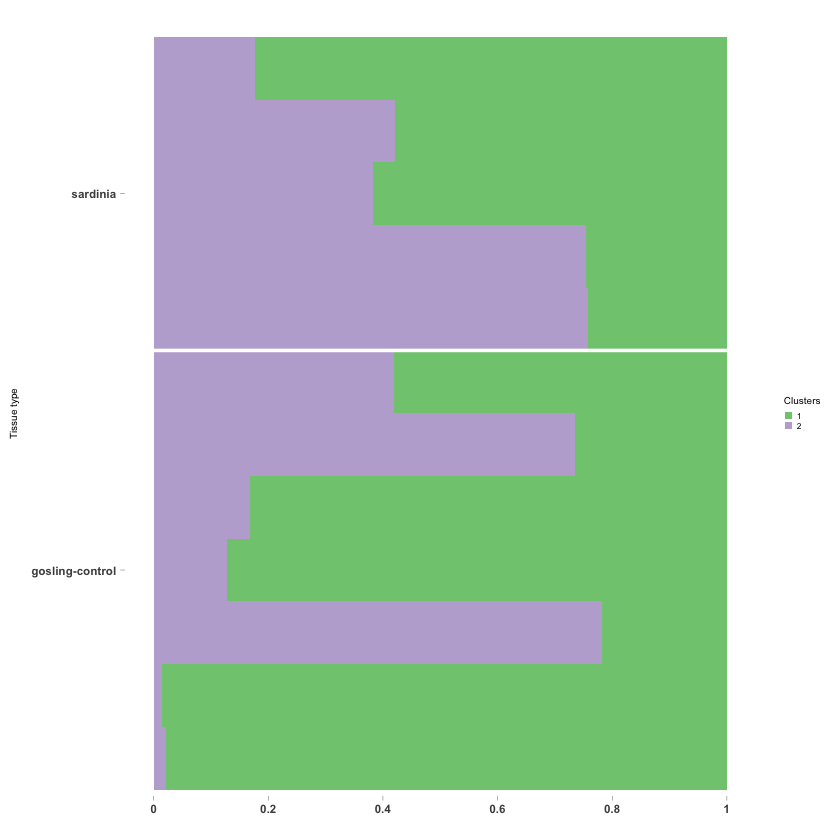

In [10]:
## classification by classtpx model

pooled_data <- rbind(trainX, testX);
class_labs <- c(rep(1, dim(trainX1)[1]), rep(2, dim(trainX2)[1]))
known_samples <- 1:(dim(trainX1)[1] + dim(trainX2)[1])

#pooled_data <- floor(10^12*pooled_data);
Topic_clus <- class_topics(
  as.matrix(pooled_data),
  K=2,
  known_samples = known_samples,
  class_labs = class_labs,
  method="omega.fix",
  shrink=FALSE,
  shrink.method = 1,
  tol=0.001,
  ord=FALSE)


labs <- c(rep("1000g", dim(ll[["1000G"]])[1]), rep("hgdp", dim(ll[["hgdp"]])[1]),
          rep("sherpa", dim(ll[["sherpa"]])[1]), rep("gosling-ancient", dim(ll[["gosling-ancient"]])[1]),
          rep("sardinia", dim(ll[["sardinia"]])[1]), rep("gosling-control", dim(ll[["gosling-control"]])[1]))

labs <- labs[-known_samples]
omega <- Topic_clus$omega[-known_samples, ];
annotation <- data.frame(
  sample_id = paste0("X", c(1:NROW(omega))),
  tissue_label = factor(labs))


CountClust::StructureGGplot(omega = as.matrix(omega),
                            annotation = annotation,
                            palette = RColorBrewer::brewer.pal(8, "Accent"),
                            yaxis_label = "Tissue type",
                            order_sample = FALSE,
                            axis_tick = list(axis_ticks_length = .1,
                                             axis_ticks_lwd_y = .1,
                                             axis_ticks_lwd_x = .1,
                                             axis_label_size = 7,
                                             axis_label_face = "bold"))

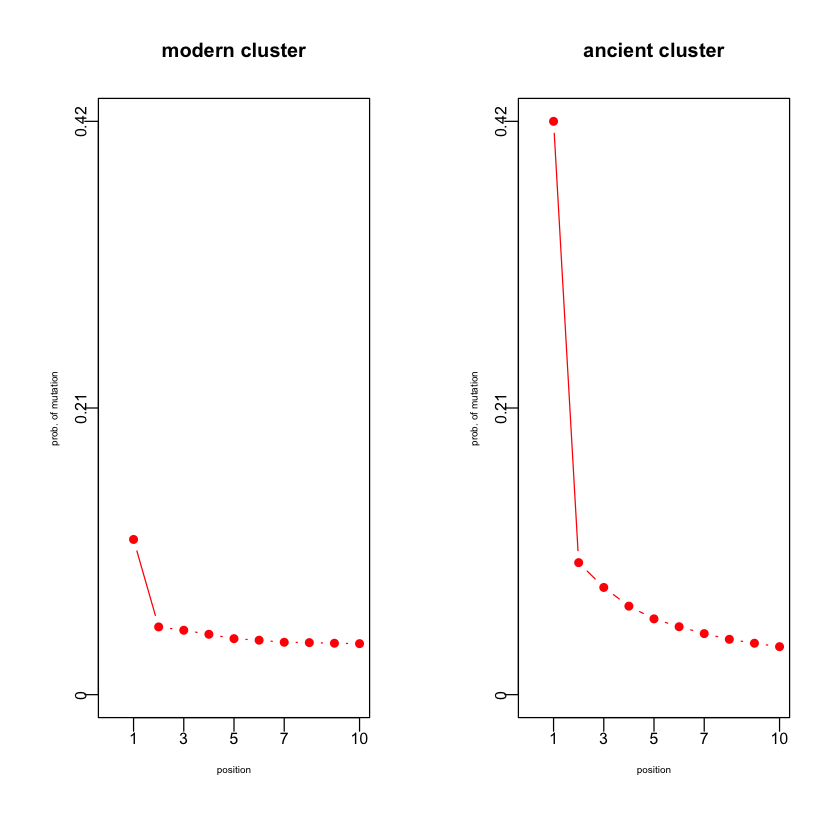

In [11]:
par(mfrow=c(1,2))
plot_graph(Topic_clus$theta[1:10,1], max_pos=10, max_prob=max(Topic_clus$theta), main="modern cluster")
plot_graph(Topic_clus$theta[1:10,2], max_pos=10, max_prob=max(Topic_clus$theta), main="ancient cluster")

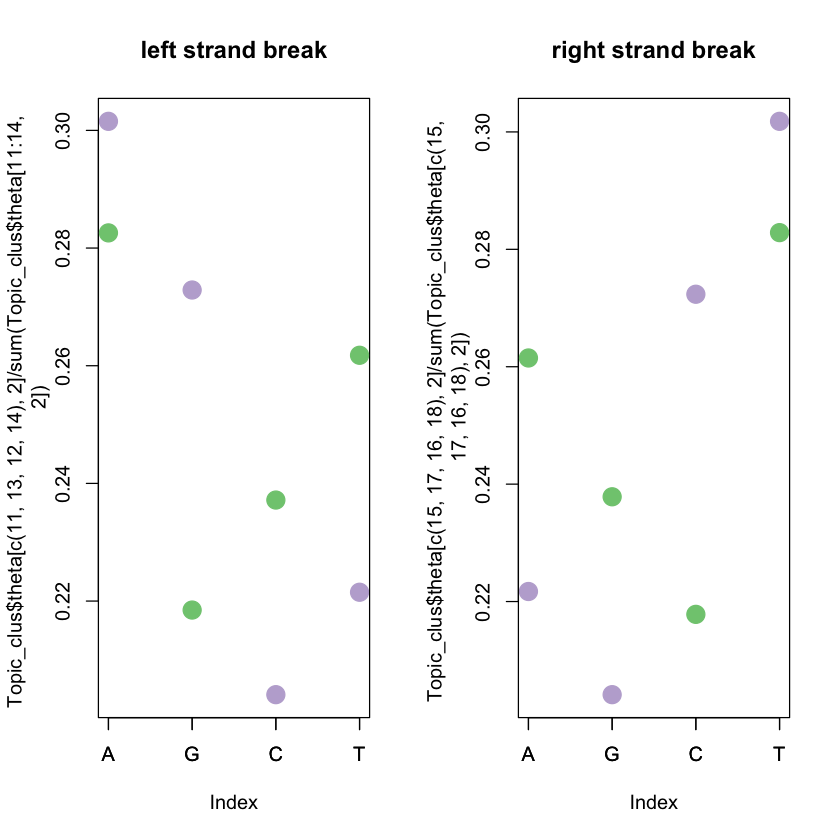

In [13]:
## Left strand break composition

cols1 <- RColorBrewer::brewer.pal(8, "Accent")
par(mfrow=c(1,2))
plot(Topic_clus$theta[c(11,13,12,14), 2]/ sum(Topic_clus$theta[11:14, 2]), col=cols1[2],
     xaxt="n", pch=20, cex=3, main="left strand break")
axis(1, at=1:4, c("A", "G", "C", "T"))
points(Topic_clus$theta[c(11,13,12,14), 1]/ sum(Topic_clus$theta[11:14, 1]),
     col=cols1[1], xaxt="n", pch=20, cex=3)
axis(1, at=1:4, c("A", "G", "C", "T"))

## right strand break composition

plot(Topic_clus$theta[c(15,17,16,18), 2]/ sum(Topic_clus$theta[c(15,17,16,18), 2]), col=cols1[2],
     xaxt="n", pch=20, cex=3, main="right strand break")
axis(1, at=1:4, c("A", "G", "C", "T"))
points(Topic_clus$theta[c(15,17,16,18), 1]/ sum(Topic_clus$theta[c(15,17,16,18), 1]),
     col=cols1[1], xaxt="n", pch=20, cex=3)
axis(1, at=1:4, c("A", "G", "C", "T"))


## Summary

We note in the classification model that the ancient class has high C to T across read length, and purine enrichment at left strand break and pyrimidine enrichment in right strand break. Based on this classifer, we find the membership
proportions in classtpx and also probability of belonging to ancient or modern class as in the SVM.

In [14]:
sessionInfo()

R version 3.3.1 (2016-06-21)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: OS X 10.12 (Sierra)

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] classtpx_0.99.0  slam_0.1-40      e1071_1.6-7      gridBase_0.4-7  
[5] maptpx_1.9-3     CountClust_0.1.2 ggplot2_2.2.1    aRchaic_0.99.0  

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.8         RColorBrewer_1.1-2  plyr_1.8.4         
 [4] class_7.3-14        tools_3.3.1         boot_1.3-18        
 [7] digest_0.6.11       uuid_0.1-2          nlme_3.1-128       
[10] jsonlite_1.2        evaluate_0.10       tibble_1.2         
[13] gtable_0.2.0        lattice_0.20-34     mgcv_1.8-16        
[16] Matrix_1.2-7.1      IRdisplay_0.4.4     parallel_3.3.1     
[19] IRkernel_0.7.1      gridExtra_2.2.1     cluster_2.0.5      
[22] repr_0.10           stringr_1